# PART 4. 시각화 도구

# 1. Matplotlib - 기본 그래프 도구

(1) 선그래프

In [1]:
#기본 사용법
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/시도별 전출입 인구수.xlsx', header=0)

In [2]:
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1, inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [3]:
sr_one=df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

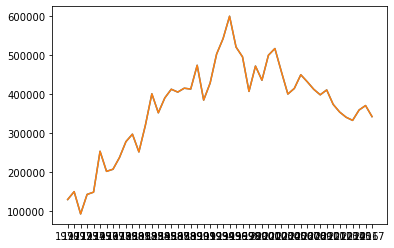

In [4]:
plt.plot(sr_one.index,sr_one.values)
plt.plot(sr_one)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from c

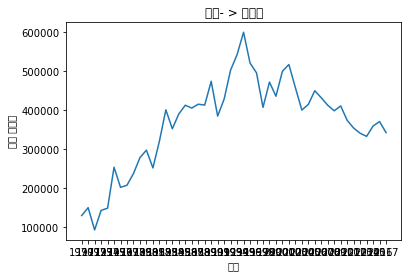

In [5]:
#차트 제목, 축 이름 추가
plt.plot(sr_one.index,sr_one.values)
plt.title('서울- > 경기도')  #제목 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

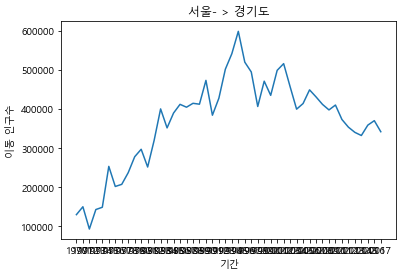

In [6]:
#matplotlib  한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path="C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.plot(sr_one.index,sr_one.values)
plt.title('서울- > 경기도')  #제목 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

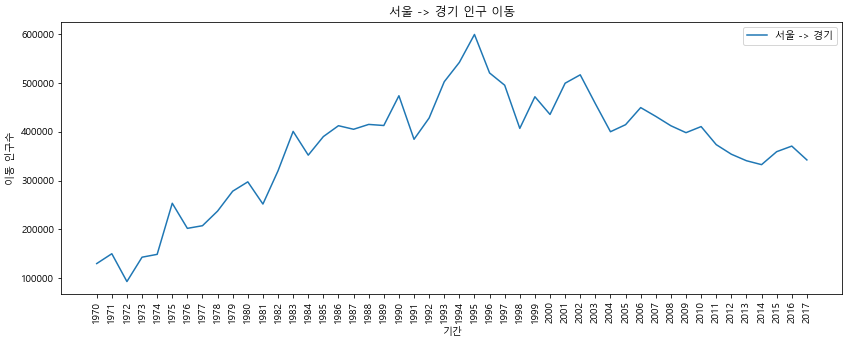

In [7]:
#그래프 꾸미기
plt.figure(figsize=(14,5))  #그림사이즈 지정
plt.xticks(rotation='vertical')  #x축 눈금 라벨 회전

plt.plot(sr_one.index,sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(labels=['서울 -> 경기'],loc='best')
plt.show()

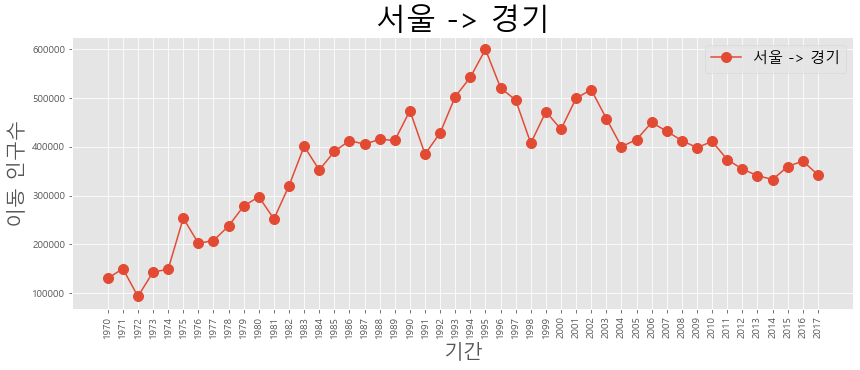

In [8]:
plt.style.use('ggplot')  #스타일 서식 지정

plt.figure(figsize=(14,5)) 
plt.xticks(rotation='vertical')

plt.plot(sr_one.index,sr_one.values, marker='o', markersize=10)
plt.title('서울 -> 경기',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수',size=20)

plt.legend(labels=['서울 -> 경기'],loc='best', fontsize=15)

plt.show()

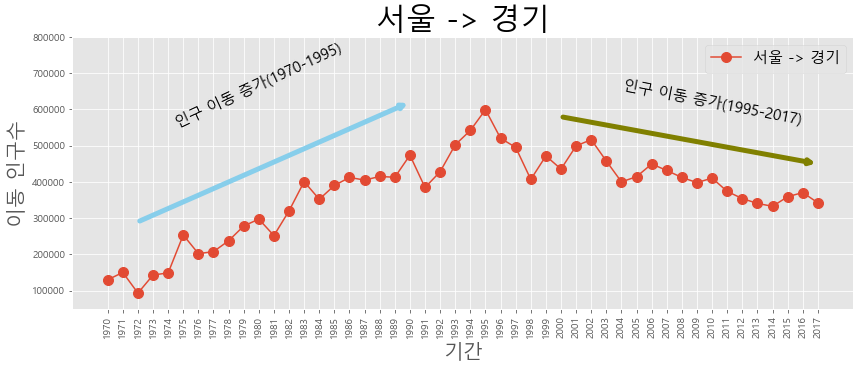

In [9]:
plt.style.use('ggplot')  #스타일 서식 지정

plt.figure(figsize=(14,5)) 
plt.xticks(rotation='vertical')

plt.plot(sr_one.index,sr_one.values, marker='o', markersize=10)
plt.title('서울 -> 경기',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수',size=20)

plt.legend(labels=['서울 -> 경기'],loc='best', fontsize=15)

plt.ylim(50000,800000)


#주석 표시 - 화살표
plt.annotate('',
            xy=(20,620000),   #화살표 머리 부분
            xytext=(2,290000),   #화살표 꼬리 부분
            xycoords='data',   #좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),  #화살표 서식
            )
plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

#주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
             xy=(10,550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15
             )

plt.annotate('인구 이동 증가(1995-2017)',
             xy=(40,560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15
             )

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_16008/3406225656.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\user\AppData\Local\Temp/ipykernel_16008/3406225656.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


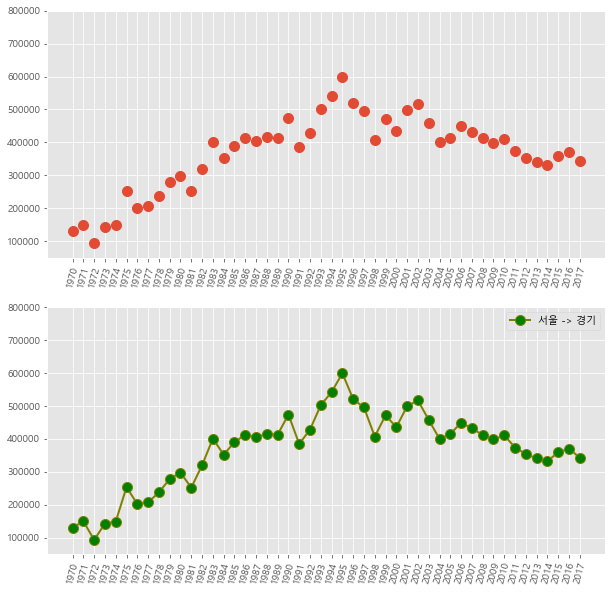

In [10]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one,marker='o',markerfacecolor='green',markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_16008/1133730172.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation=75)


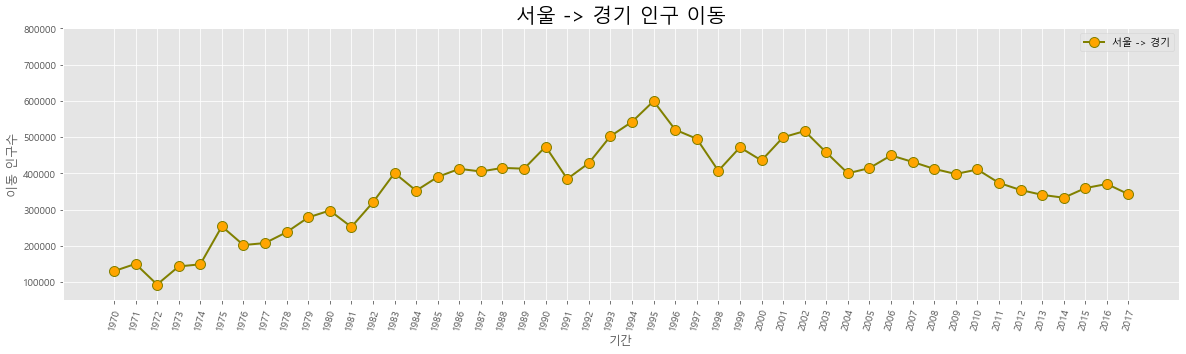

In [11]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o',markerfacecolor='orange',markersize=10,
       color='olive',linewidth=2,label='서울 -> 경기')
ax.legend(loc='best')
ax.set_ylim(50000,800000)
ax.set_title('서울 -> 경기 인구 이동',size=20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수',size=12)
ax.set_xticklabels(sr_one.index,rotation=75)
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_16008/2052436959.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

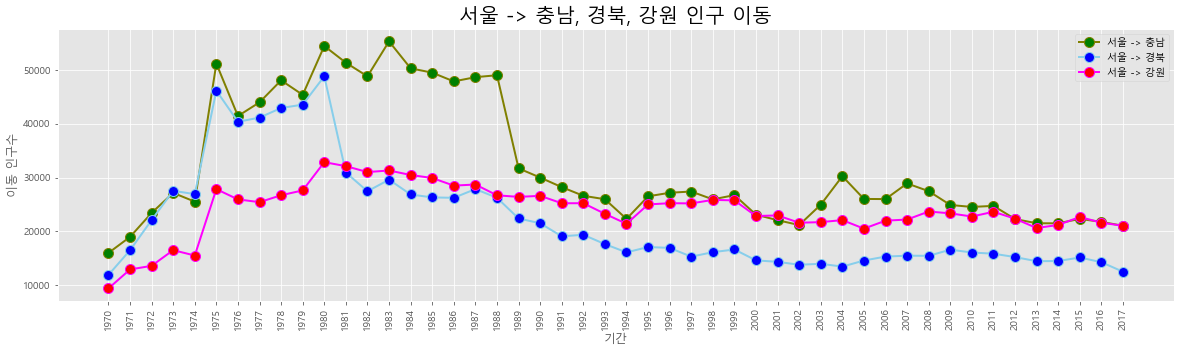

In [12]:
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:],marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:],marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
#축 눈금 라벨 크기
ax.set_xticklabels(col_years, rotation=90)
ax.tick_params(axis='x', labelsize=10)

plt.show

C:\Users\user\AppData\Local\Temp/ipykernel_16008/4140370200.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_16008/4140370200.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_16008/4140370200.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_16008/4140370200.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

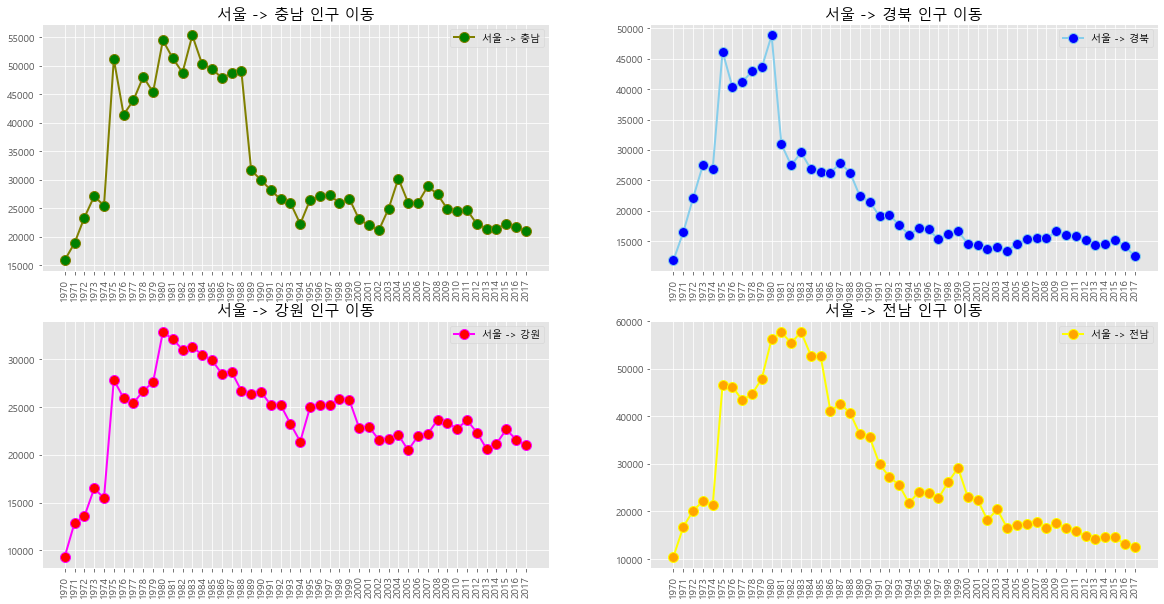

In [13]:
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.plot(col_years, df_3.loc['충청남도',:],marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax2.plot(col_years, df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax3.plot(col_years, df_3.loc['강원도',:],marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')
ax4.plot(col_years, df_3.loc['전라남도',:],marker='o',markerfacecolor='orange',
       markersize=10,color='yellow',linewidth=2,label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

#축 눈금 라벨 크기
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)


plt.show

(2) 면적 그래프

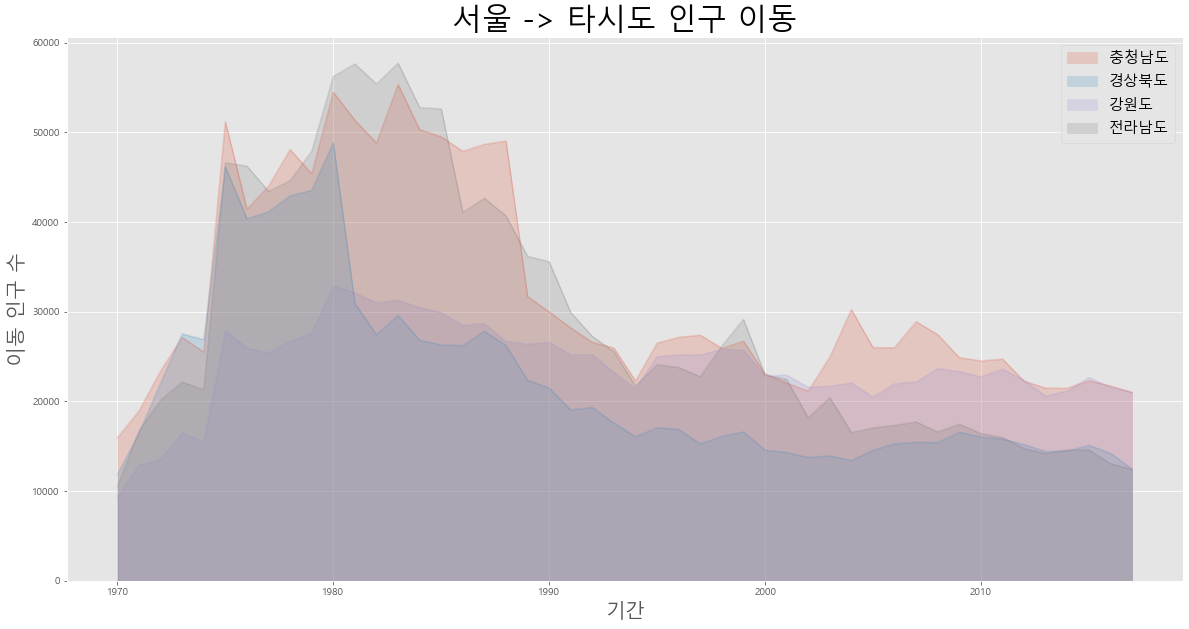

In [14]:
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.transpose()

plt.style.use('ggplot')

df_4.index=df_4.index.map(int)

df_4.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

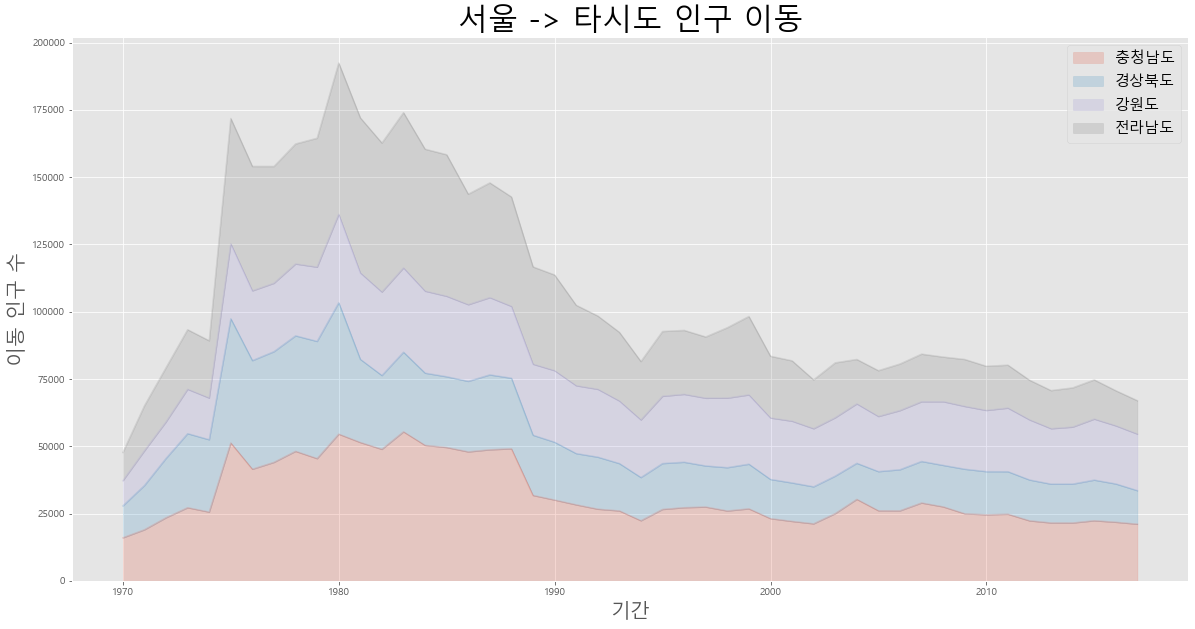

In [15]:
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.transpose()

plt.style.use('ggplot')

df_4.index=df_4.index.map(int)

df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


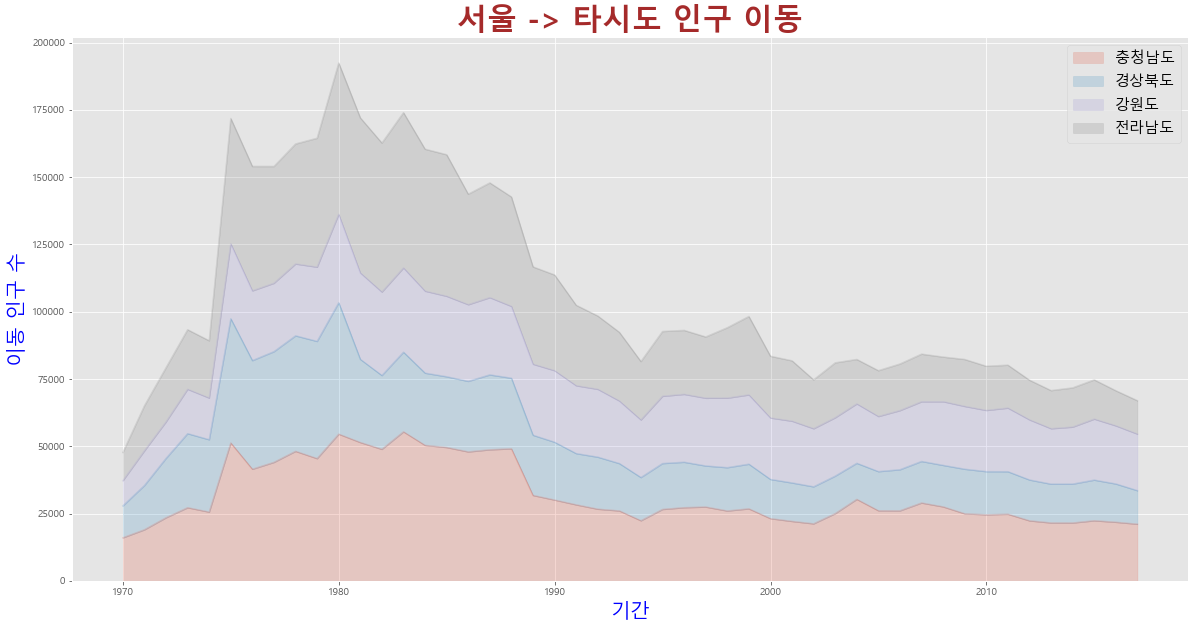

In [16]:
df_4.index=df_4.index.map(int)

ax=df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동',size=30,color='brown',weight='bold')
ax.set_ylabel('이동 인구 수', size=20,color='blue')
ax.set_xlabel('기간',size=20,color='blue')
ax.legend(loc='best',fontsize=15)

plt.show()

(3) 막대그래프

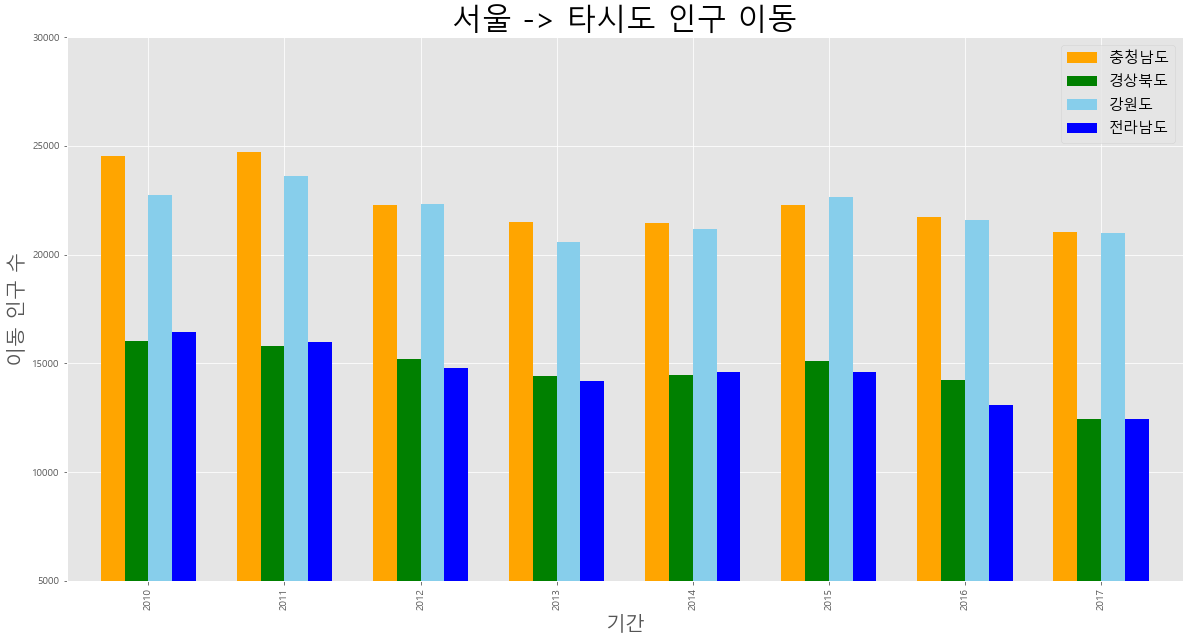

In [17]:
col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.transpose()
df_4.plot(kind='bar',figsize=(20,10),width=0.7,
         color=['orange','green','skyblue','blue'])
plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

plt.show()

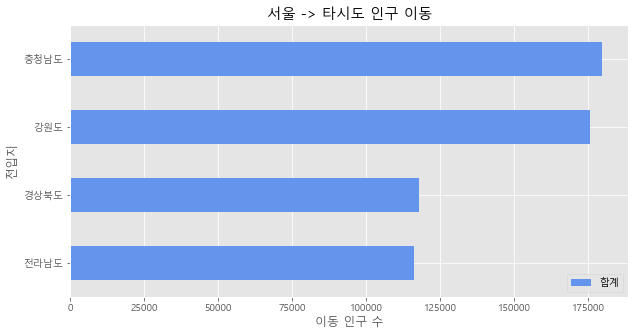

In [18]:
col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

df_4['합계']=df_4.sum(axis=1)

df_total=df_4[['합계']].sort_values(by='합계',ascending=True)

plt.style.use('ggplot')

df_total.plot(kind='barh',color='cornflowerblue',width=0.5,figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_16008/2169395185.py:13: FutureWarning: convert_float is deprecated and will be removed in a future version
  df=pd.read_excel('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/남북한발전전력량.xlsx',convert_float=True)  #conver_float=True: 숫자데이터를 int형으로, False이면 float형


Text(0, 0.5, '전년 대비 증감률(%)')

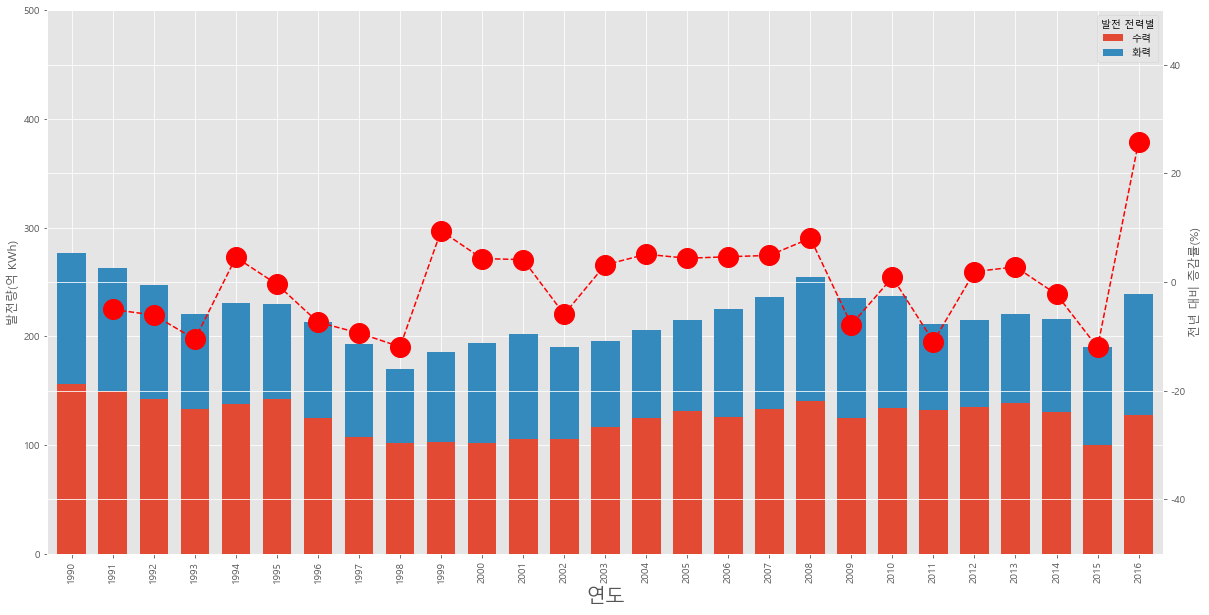

In [30]:
#보조축 그리기(y축 두개)
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path="C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

df=pd.read_excel('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/남북한발전전력량.xlsx',convert_float=True)  #conver_float=True: 숫자데이터를 int형으로, False이면 float형
df=df.loc[5:9]
df.drop('전력량 (억㎾h)',axis='columns',inplace=True)
df.set_index('발전 전력별',inplace=True)
df=df.T

df=df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년']=df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년'])-1)*100

#2축 그래프 그리기
ax1=df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2=ax1.twinx()
ax2.plot(df.index,df.증감률,ls='--',marker='o',markersize=20,color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

(4)히스토그램

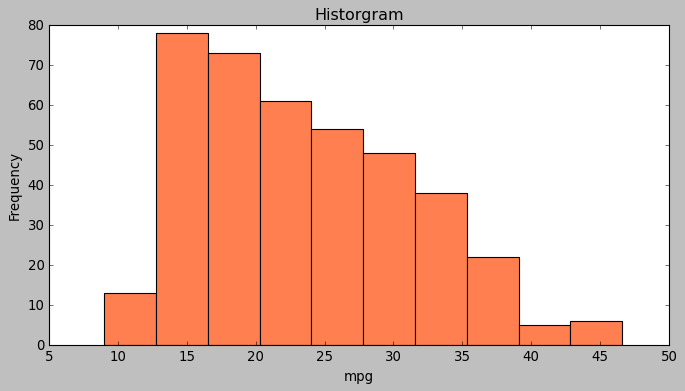

In [31]:
plt.style.use('classic')

df=pd.read_csv('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['mpg'].plot(kind='hist',bins=10, color='coral',figsize=(10,5))

plt.title('Historgram')
plt.xlabel('mpg')
plt.show()

(5) 산점도

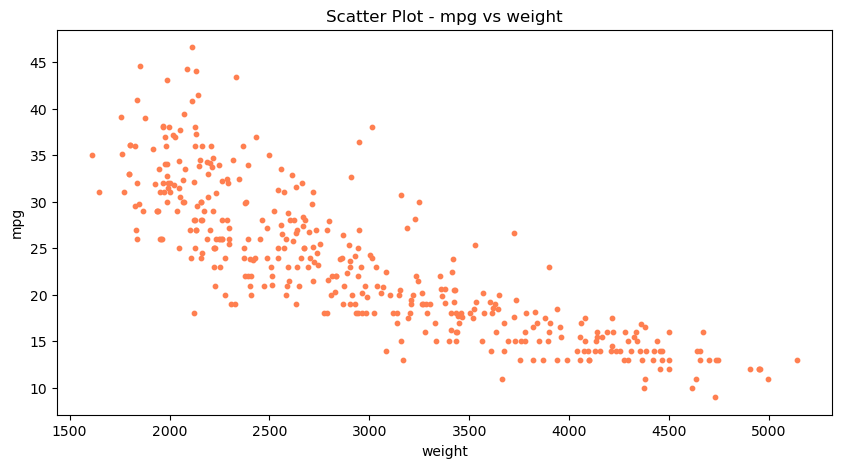

In [33]:
plt.style.use('default')
df=pd.read_csv('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

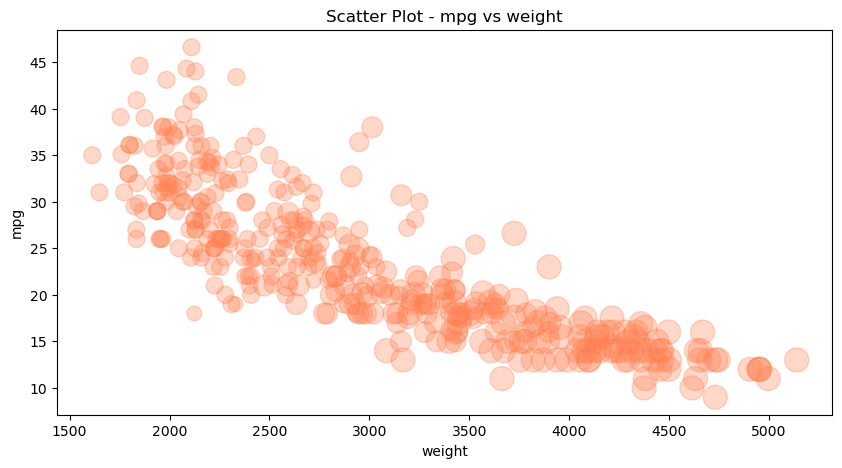

In [36]:
cylinders_size=df.cylinders/df.cylinders.max() * 300

df.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5),s=cylinders_size,alpha=0.3)
plt.title('Scatter Plot - mpg vs weight')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_16008/1411125427.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparend" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Desktop/쿠글 여름 스터디/scatter_transparent.png",transparend=True)


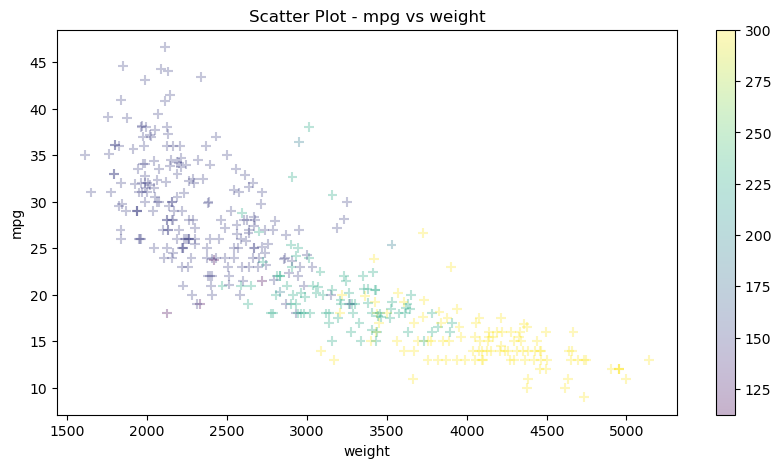

In [39]:
cylinders_size=df.cylinders/df.cylinders.max() * 300

df.plot(kind='scatter',x='weight',y='mpg',marker='+',figsize=(10,5),cmap='viridis',c=cylinders_size,s=50,alpha=0.3)
plt.title('Scatter Plot - mpg vs weight')

plt.savefig("C:/Users/user/Desktop/쿠글 여름 스터디/scatter.png")
plt.savefig("C:/Users/user/Desktop/쿠글 여름 스터디/scatter_transparent.png",transparend=True)

plt.show()

(6) 파이 차트

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


AttributeError: module 'matplotlib.pyplot' has no attribute 'tutke'

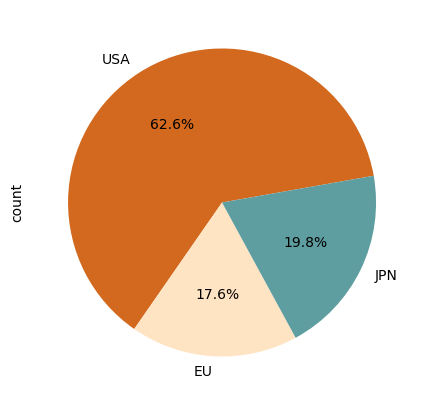

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv("C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/auto-mpg.csv", header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df['count']=1  #값 1을 가진 열 추가
df_origin=df.groupby('origin').sum()  #origin 열을 기준으로 그룹화,합계
print(df_origin.head())

df_origin.index=['USA','EU','JPN']

df_origin['count'].plot(kind='pie',
                       figsize=(7,5),
                       autopct='%1.1f%%',
                       startangle=10,
                       colors=['chocolate','bisque','cadetblue'])

plt.tutke('Model Origin',size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index,loc='upper right')
plt.show()

(7) 박스플롯

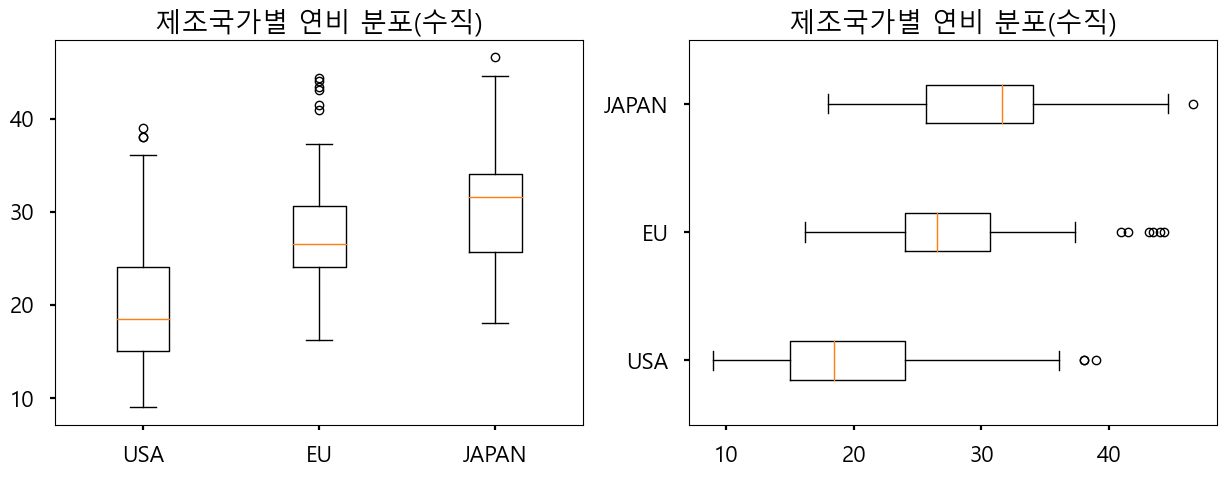

In [9]:
from matplotlib import font_manager, rc
font_path ="C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False

df=pd.read_csv('C:/Users/user/Desktop/쿠글 여름 스터디/2주차 자료/part4/auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
           labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
           labels=['USA','EU','JAPAN'],
           vert=False)


ax1.set_title('제조국가별 연비 분포(수직)')
ax2.set_title('제조국가별 연비 분포(수직)')

plt.show()